In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Modules.custom_funx import *
from Modules.plot_utils import *

In [6]:
#--- Loading data ---#
dir_name = 'Data/Stroma/qh03/'
data = load_files(dir_name) 
# print(data)
roi = np.array([(1347,1365),(1774,1800)])
trim_data,cor_spectra, bdata = correct_spectra(data,roi,pol_order = 3)
normSpectra = norm_spectra(trim_data)
# normSpectra


In [7]:
#--- Fit parameters ---#
params = lmfit.Parameters()
algo = 'leastsq'
#               (Name,  Value,   Vary,   Min,     Max,       Expr)
params.add_many(
                # Protein
                ('a1',   0.1,    True,    0,      0.2,     None), #Amplitude
                ('f1',   1740,   True,   1735,    1755,    None), #position
                ('l1',   5,      True,    1,      50,     None), # FWHM

                ('a2',   0.04,    True,     0,      0.2,    None),   #Amplitude
                ('f2',   1725,   True,   1720,     1745,     None),
                ('l2',    5,    True,    1,       50,    None), 
                # Lipid
                ('a3',   0.9,    True,    0,       1,        None),  # Amplitude
                ('f3',   1654,   True,    1640,   1660,     None),
                ('l3',   20,     True,     10,     40,      None),

                ('a4',   0.9,    True,      0,      1,      None), # Amplitude
                ('f4',   1636,   True,   1630,    1650,     None),
                ('l4',   20,     True,     10,     80,      None), 
                
                ####
                ('a5',   0.3,    True,    0.0,     1,       None), # Amplitude
                ('f5',   1547,   True,    1592,    1505,    None),
                ('l5',   40,     True,     0,      100,     None),

                ('a6',   0.7,    True,     0.0,       1,    None), # Amplitude
                ('f6',   1453,   True,    1425,    1470,    None),
                ('l6',   20,     True,     0,      50,      None),   
                
                ('a7',   0.07,    True,     0.0,    1,      None), # Amplitude
                ('f7',   1378,   True,    1350,    1380,    None),
                ('l7',   10,     True,     0,      10,      None),   
                        
               )
# print(params.pretty_print())

y_10..completed ...
y_13..completed ...
y_16..completed ...
y_19..completed ...
y_22..completed ...
y_25..completed ...
y_28..completed ...
y_31..completed ...
y_34..completed ...
y_37..completed ...
y_40..completed ...
y_43..completed ...
y_46..completed ...
y_49..completed ...
y_52..completed ...
y_55..completed ...
y_58..completed ...
y_61..completed ...
y_64..completed ...
y_67..completed ...
y_70..completed ...
y_73..completed ...
y_76..completed ...
y_79..completed ...
y_82..completed ...
y_85..completed ...


<module 'matplotlib.pyplot' from 'd:\\Users\\avrat\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

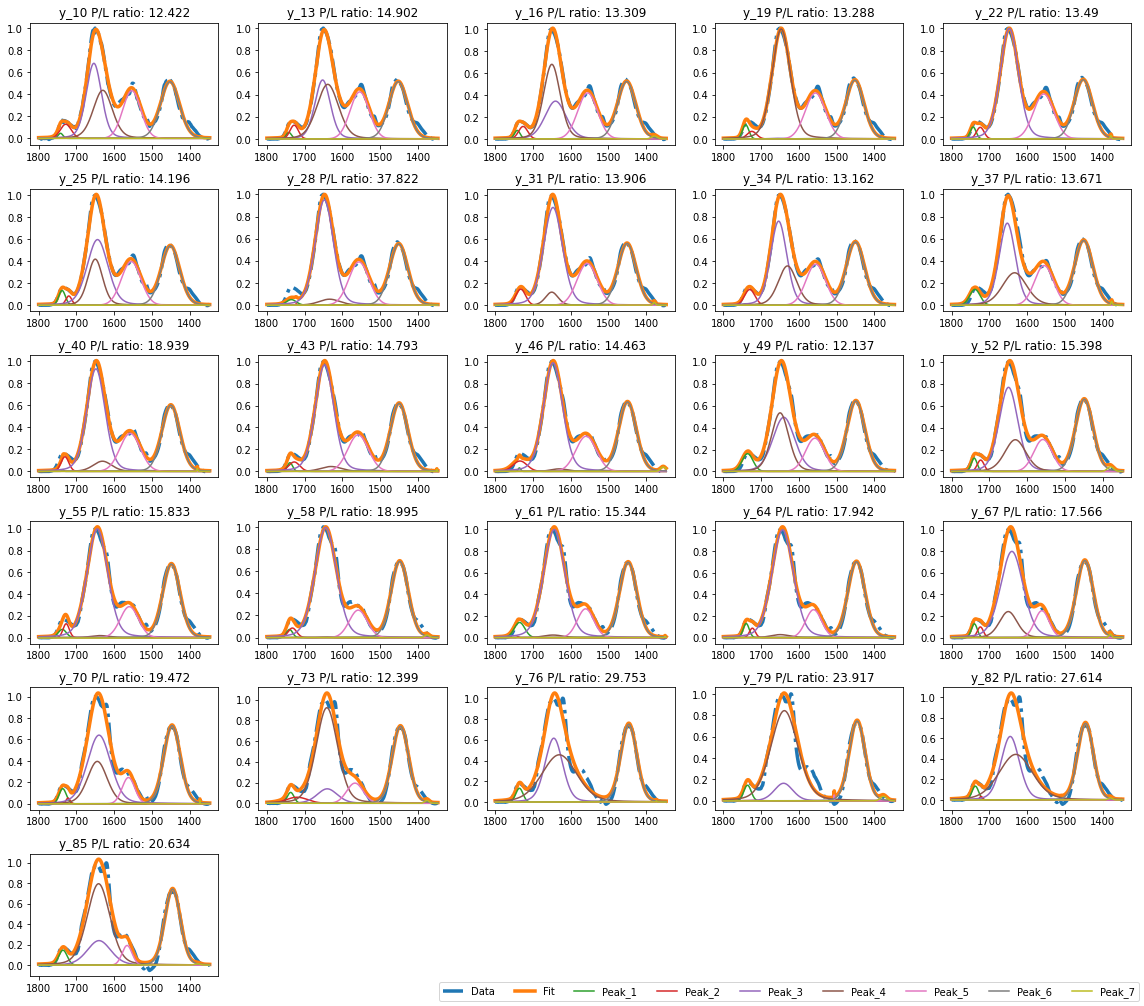

In [8]:
#--- Run Multi fit ---#               
df_stats, df_variables, df_residual, df_plot = run_multifit(normSpectra,params, algo = 'leastsq', message = True)

ratio = protein_to_lipid(df_plot,normSpectra['x'])
# print(ratio)
plot_fitres(df_plot,normSpectra['x'],ratio=ratio)  


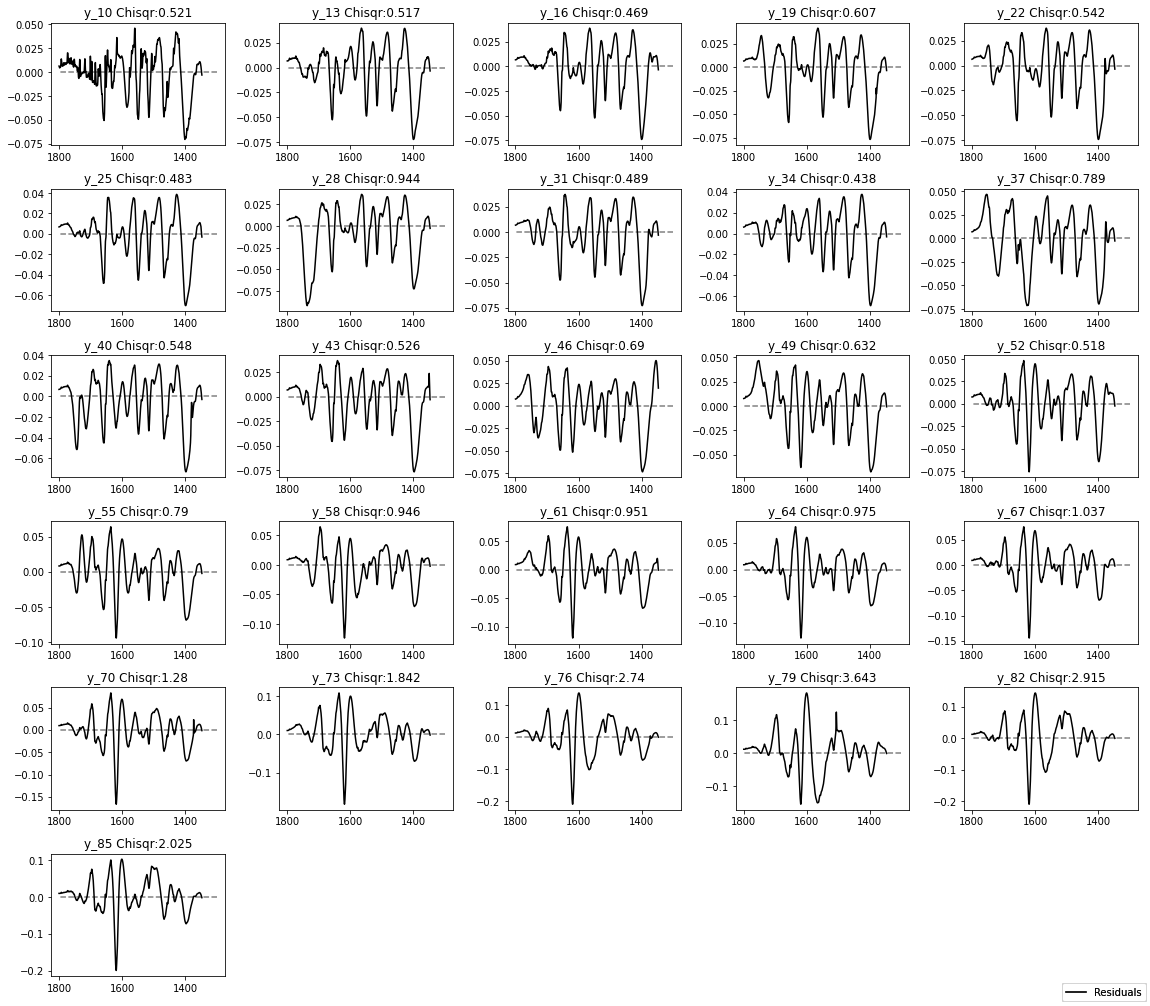

In [9]:
plot_residuals(df_residual,df_stats)
plt.show()